# Evaluation procedure #1: Train and test on the entire dataset
 - Train the model on the entire dataset.
 - Test the model on the same dataset, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

In [1]:
#read in the iris data
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

#create X (features) and y(response)
X=iris.data
y=iris.target

# Logistic Regression

In [3]:
#import the model

from sklearn.linear_model import LogisticRegression

#instantiate the model
logreg=LogisticRegression()

#fit the model with the data

logreg.fit(X, y)

#predict the response values from the observations in X
logreg.predict(X)

C:\Users\Dan Masibo\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

150

Classification accuracy:

 - **Proportion** of correct predictions
 - Common **evaluation metric** for classification problems

In [5]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


- Known as training accuracy when you train and test the model on the same data

# KNN (K=5)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred=knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


# KNN (K=5)

In [14]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred=knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


## Problems with training and testing on the same data
 - Goal is to estimate likely performance of a model on **out-of-sample** data
 - But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
 - Unnecessarily complex models **overfit** the training data

## Evaluation procedure #2: Train/test split
 - Split the dataset into two pieces: a **training** set and a testing set.
 - Train the model on the **training** set.
 - Test the model on the **testing** set, and evaluate how well we did.

In [15]:
#print the shapes of x & y

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [17]:
from sklearn.model_selection import train_test_split_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=4)

## What did this accomplish?

 - Model can be trained and tested on **different data**
 - Response values are known for the testing set, and thus **predictions** can be evaluated
 - **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

In [20]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [21]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [23]:
logreg=LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


## KNN (K=5)

In [25]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


## KNN (K=1)

In [26]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


## Can we locate an even better value for K?

In [28]:
# try K=1 through K=25 and record testing accuracy
k_range=list(range(1,26))
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Testing Accuracy')

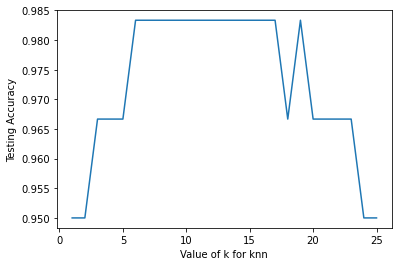

In [31]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for knn')
plt.ylabel('Testing Accuracy')

 - **Training accuracy** rises as model complexity increases
 - **Testing accuracy** penalizes models that are too complex or not complex enough
 - For KNN models, complexity is determined by the **value of K** (lower value = more complex)

## Downsides of train/test split?
 - Provides a **high-variance estimate** of out-of-sample accuracy
 - **K-fold cross-validation** overcomes this limitation
 - But, train/test split is still useful because of its **flexibility and speed**